In [191]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split

In [192]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv"

In [193]:
data = pd.read_csv(url, index_col=False) 

In [194]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [195]:
data['Cabin'].isnull().sum()

687

In [196]:
data['Embarked'].isnull().sum()

2

In [197]:
data['Fare'].isnull().sum()

0

In [198]:
data['Ticket'].isnull().sum()

0

In [199]:
data['PassengerId'].isnull().sum()

0

In [200]:
data['Parch'].isnull().sum()

0

In [201]:
data['Age'].isnull().sum()

177

In [202]:
data['Sex'].isnull().sum()

0

In [203]:
data['Name'].isnull().sum()

0

In [204]:
data['Pclass'].isnull().sum()

0

In [205]:
data['Survived'].isnull().sum()

0

In [206]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [207]:
data.drop('Name',axis = 1, inplace=True)

In [208]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [209]:
most_common_cabin = data['Cabin'].value_counts().idxmax()
print("Most common cabin:", most_common_cabin)

count = data['Cabin'].value_counts().max()
print("It appears", count, "times")


Most common cabin: B96 B98
It appears 4 times


In [210]:
data['Cabin'].fillna('B98', inplace=True)


C:\Users\MOBIT\AppData\Local\Temp\ipykernel_3932\1664677238.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Cabin'].fillna('B98', inplace=True)


In [211]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

C:\Users\MOBIT\AppData\Local\Temp\ipykernel_3932\1981374165.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)


In [212]:
data['Age'].isnull().sum()

0

In [213]:
dummies = pd.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, drop_first=True, dtype=None)


In [214]:
dummies['Sex_male']

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: Sex_male, Length: 891, dtype: bool

In [215]:
df2 = pd.concat([data, dummies], axis=1)

In [217]:
df2.drop(['Cabin','Embarked','Ticket','Parch','SibSp','Sex'], axis=1, inplace=True)


In [218]:
df2

,PassengerId,Survived,Pclass,Age,Fare,PassengerId,Survived,Pclass,Age,Fare,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,0,3,22.000000,7.2500,1,0,3,22.000000,7.2500,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,38.000000,71.2833,2,1,1,38.000000,71.2833,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,26.000000,7.9250,3,1,3,26.000000,7.9250,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,35.000000,53.1000,4,1,1,35.000000,53.1000,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,35.000000,8.0500,5,0,3,35.000000,8.0500,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,13.0000,887,0,2,27.000000,13.0000,...,False,False,False,False,False,False,False,False,False,True
887,888,1,1,19.000000,30.0000,888,1,1,19.000000,30.0000,...,False,False,False,False,False,False,False,False,False,True
888,889,0,3,29.699118,23.4500,889,0,3,29.699118,23.4500,...,False,False,False,False,False,False,False,False,False,True
889,890,1,1,26.000000,30.0000,890,1,1,26.000000,30.0000,...,False,False,False,False,False,False,False,False,False,False


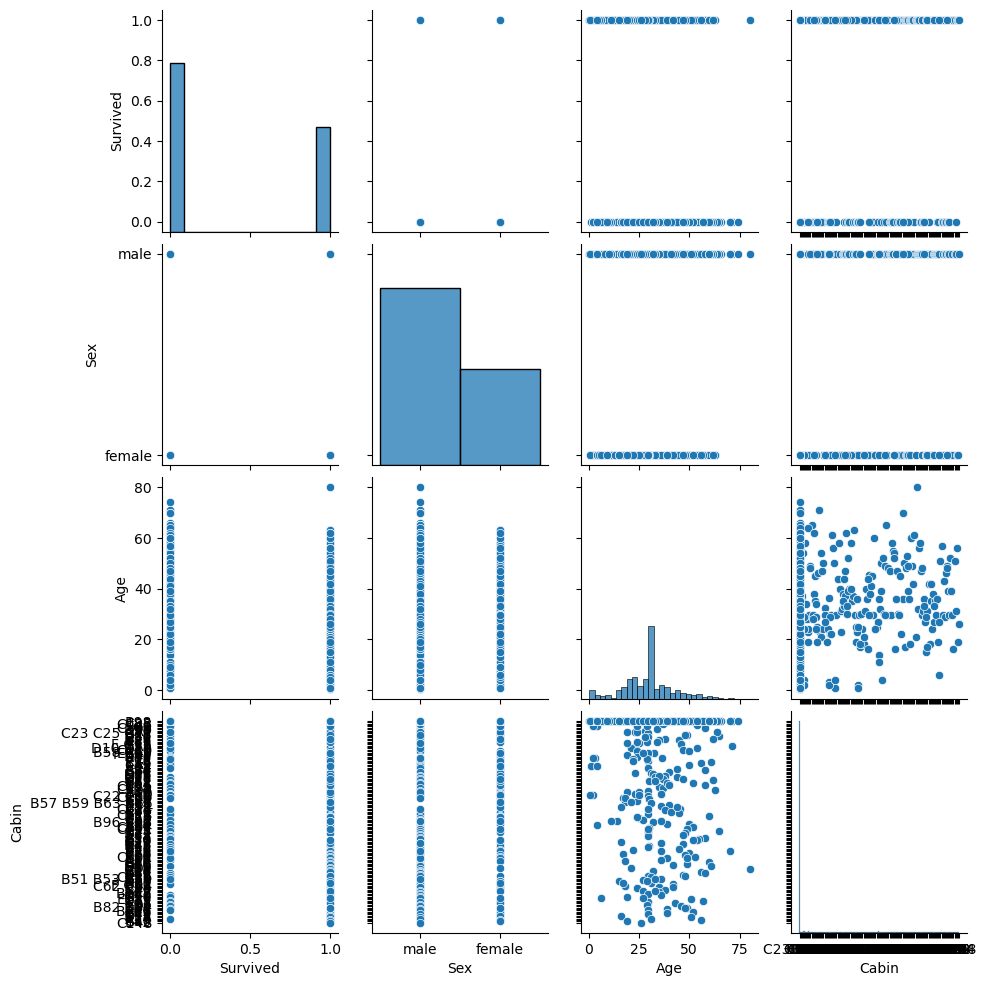

In [219]:
sns.pairplot(data,vars=['Survived', 'Sex', 'Age', 'Cabin'])
plt.show()

In [220]:
minmax_features = df2[['Age', 'Fare']]

In [221]:
df = df2.copy()

In [222]:
sc = StandardScaler()
df2[['Age', 'Fare']] = sc.fit_transform(minmax_features)

In [223]:
df2

,PassengerId,Survived,Pclass,Age,Fare,PassengerId,Survived,Pclass,Age,Fare,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,0,3,-0.592481,-0.502445,1,0,3,-0.592481,-0.502445,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,0.638789,0.786845,2,1,1,0.638789,0.786845,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,-0.284663,-0.488854,3,1,3,-0.284663,-0.488854,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,0.407926,0.420730,4,1,1,0.407926,0.420730,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,0.407926,-0.486337,5,0,3,0.407926,-0.486337,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,-0.207709,-0.386671,887,0,2,-0.207709,-0.386671,...,False,False,False,False,False,False,False,False,False,True
887,888,1,1,-0.823344,-0.044381,888,1,1,-0.823344,-0.044381,...,False,False,False,False,False,False,False,False,False,True
888,889,0,3,0.000000,-0.176263,889,0,3,0.000000,-0.176263,...,False,False,False,False,False,False,False,False,False,True
889,890,1,1,-0.284663,-0.044381,890,1,1,-0.284663,-0.044381,...,False,False,False,False,False,False,False,False,False,False


In [224]:
df

,PassengerId,Survived,Pclass,Age,Fare,PassengerId,Survived,Pclass,Age,Fare,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,0,3,22.000000,7.2500,1,0,3,22.000000,7.2500,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,38.000000,71.2833,2,1,1,38.000000,71.2833,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,26.000000,7.9250,3,1,3,26.000000,7.9250,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,35.000000,53.1000,4,1,1,35.000000,53.1000,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,35.000000,8.0500,5,0,3,35.000000,8.0500,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,13.0000,887,0,2,27.000000,13.0000,...,False,False,False,False,False,False,False,False,False,True
887,888,1,1,19.000000,30.0000,888,1,1,19.000000,30.0000,...,False,False,False,False,False,False,False,False,False,True
888,889,0,3,29.699118,23.4500,889,0,3,29.699118,23.4500,...,False,False,False,False,False,False,False,False,False,True
889,890,1,1,26.000000,30.0000,890,1,1,26.000000,30.0000,...,False,False,False,False,False,False,False,False,False,False


In [225]:
df2 = df2.loc[:, ~df2.columns.duplicated()]

In [226]:
df2

,PassengerId,Survived,Pclass,Age,Fare,Sex_male,Ticket_110413,Ticket_110465,Ticket_110564,Ticket_110813,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,0,3,-0.592481,-0.502445,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,0.638789,0.786845,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,-0.284663,-0.488854,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,0.407926,0.420730,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,0.407926,-0.486337,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,-0.207709,-0.386671,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
887,888,1,1,-0.823344,-0.044381,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
888,889,0,3,0.000000,-0.176263,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
889,890,1,1,-0.284663,-0.044381,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [235]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X = df2[['Age', 'Fare', 'Cabin_F G63', 'Cabin_F G73', 'Cabin_F2', 
         'Cabin_F33', 'Cabin_F38', 'Cabin_F4', 'Cabin_G6', 'Cabin_T', 
         'Embarked_Q', 'Embarked_S']]
y = df2['Survived'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])
X_test[['Age', 'Fare']] = scaler.transform(X_test[['Age', 'Fare']])


model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

print("Test Accuracy:", model.score(X_test, y_test))



Test Accuracy: 0.6703910614525139


In [236]:
y_pred = model.predict(X_test)
mean_squared_error(y_pred, y_test)

0.329608938547486

In [237]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)

print("Cross-validated scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validated scores: [0.61452514 0.73033708 0.67977528 0.69662921 0.66853933]
Mean accuracy: 0.6779612077082418


In [238]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_scores = cross_val_score(knn_model, X, y, cv=5)
print("\nKNN CV scores:", knn_scores)
print("KNN Mean Accuracy:", knn_scores.mean())


KNN CV scores: [0.5698324  0.63483146 0.68539326 0.69662921 0.66853933]
KNN Mean Accuracy: 0.6510451321323206
